Data ini diambil dari: https://www.kaggle.com/datasets/sandeep1080/baked-food-nutritions-check-are-you-healthy

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Data yang digunakan pada Checkpoint 3 ini adalah data yang telah di bersihkan pada Checkpoint sebelumnya.**

In [58]:
file_path = "/content/drive/MyDrive/AVD/BakedFoodNutritions_cleaned.csv"
df = pd.read_csv(file_path)

print(df)

                Food                                   ProductType  \
0           Andrea'S                  Gluten Free Soft Dinner Roll   
1            Archway                            Home Style Cookies   
2            Archway                            Home Style Cookies   
3            Archway                            Home Style Cookies   
4            Archway                            Home Style Cookies   
..               ...                                           ...   
651          Waffles                                       Waffles   
652          Waffles                                       Waffles   
653          Waffles                                       Waffles   
654          Waffles                                       Waffles   
655  Wonton Wrappers  Wonton Wrappers (Includes Egg Roll Wrappers)   

                                    FlavorVariant  Calories-kcl  Protein-g  \
0                            Prepared From Recipe           257        5.7   
1  

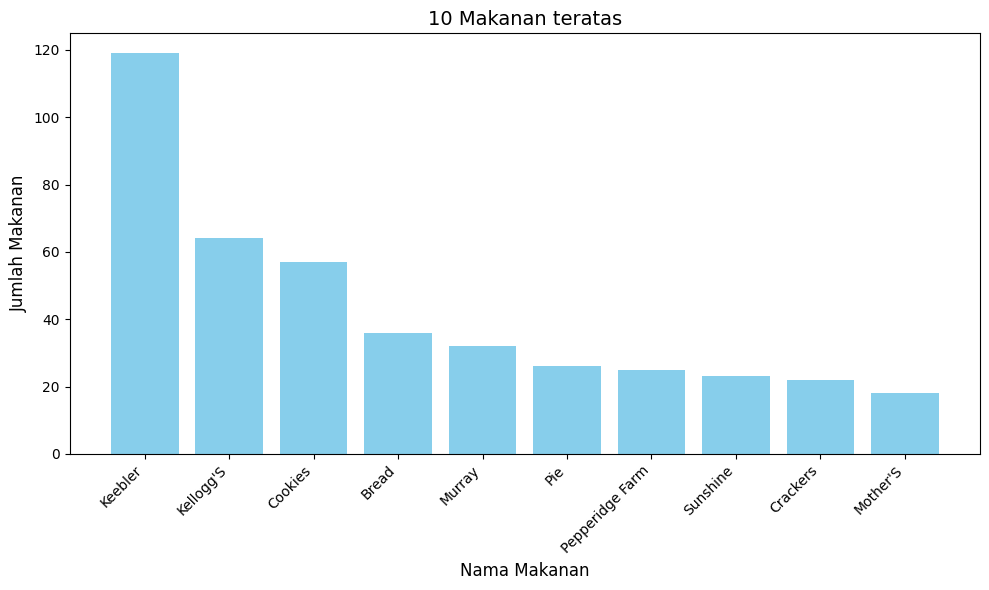

In [59]:
food_counts = df['Food'].value_counts()

top_n = 10
top_food = food_counts.head(top_n)

plt.figure(figsize=(10, 6))
plt.bar(top_food.index, top_food.values, color='skyblue')

plt.title('10 Makanan teratas', fontsize=14)
plt.xlabel('Nama Makanan', fontsize=12)
plt.ylabel('Jumlah Makanan', fontsize=12)

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

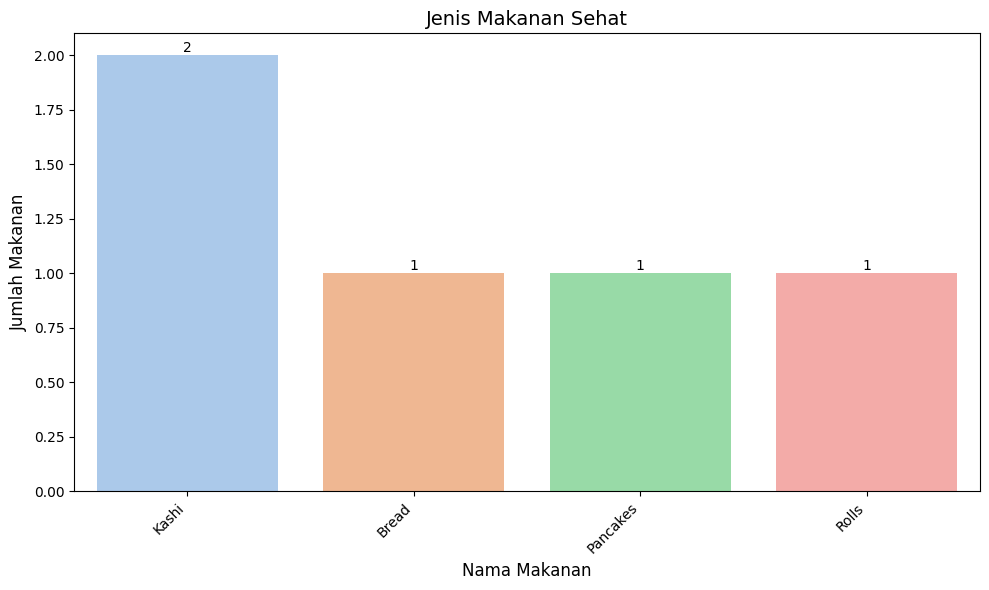

In [60]:
healthy_foods = df[df['Keterangan'] == 'Sehat']

healthy_counts = healthy_foods['Food'].value_counts().reset_index()
healthy_counts.columns = ['Food', 'Jumlah']

plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='Food', y='Jumlah', data=healthy_counts, hue='Food', palette='pastel')

for p in bar_plot.patches:
    bar_plot.annotate(f'{int(p.get_height())}',
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='bottom')

plt.title('Jenis Makanan Sehat', fontsize=14)
plt.xlabel('Nama Makanan', fontsize=12)
plt.ylabel('Jumlah Makanan', fontsize=12)

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

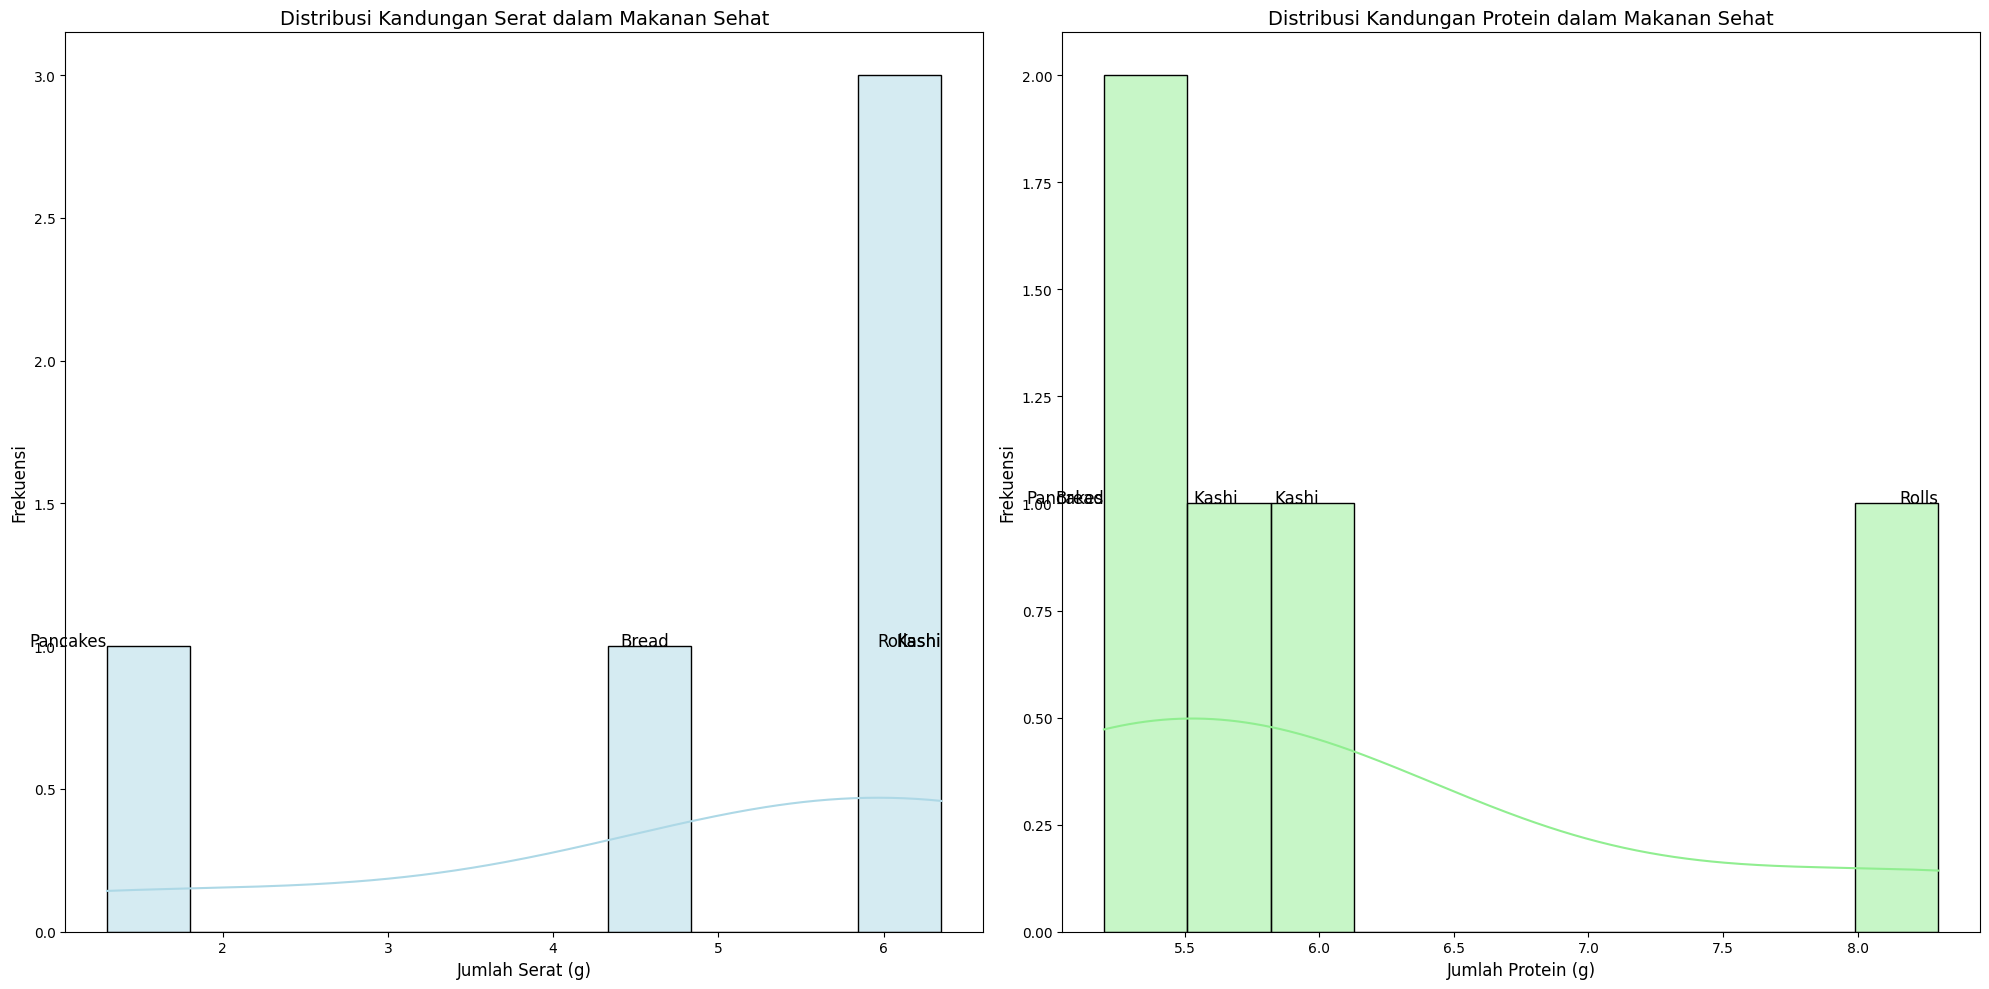

In [61]:
healthy_foods = df[df['Keterangan'] == 'Sehat']

plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
sns.histplot(healthy_foods['Fiber-g'], bins=10, kde=True, color='lightblue')
plt.title('Distribusi Kandungan Serat dalam Makanan Sehat', fontsize=14)
plt.xlabel('Jumlah Serat (g)', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)

for index, row in healthy_foods.iterrows():
    plt.annotate(row['Food'],
                 (row['Fiber-g'], 1),
                 rotation=0,
                 fontsize=12,
                 ha='right')

plt.subplot(1, 2, 2)
sns.histplot(healthy_foods['Protein-g'], bins=10, kde=True, color='lightgreen')
plt.title('Distribusi Kandungan Protein dalam Makanan Sehat', fontsize=14)
plt.xlabel('Jumlah Protein (g)', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)

for index, row in healthy_foods.iterrows():
    plt.annotate(row['Food'],
                 (row['Protein-g'], 1),
                 rotation=0,
                 fontsize=12,
                 ha='right')

plt.tight_layout()
plt.show()

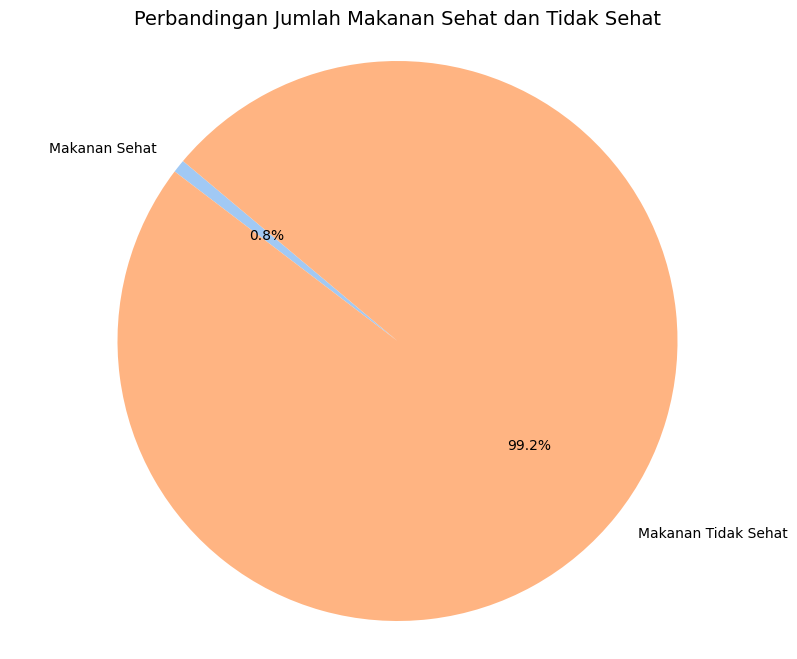

In [62]:
healthy_count = df[df['Keterangan'] == 'Sehat'].shape[0]
unhealthy_count = df[df['Keterangan'] == 'Tidak Sehat'].shape[0]

comparison_data = pd.DataFrame({
    'Keterangan': ['Makanan Sehat', 'Makanan Tidak Sehat'],
    'Jumlah Makanan': [healthy_count, unhealthy_count]
})

plt.figure(figsize=(10, 8))
plt.pie(comparison_data['Jumlah Makanan'], labels=comparison_data['Keterangan'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))

plt.title('Perbandingan Jumlah Makanan Sehat dan Tidak Sehat', fontsize=14)

plt.axis('equal')
plt.show()

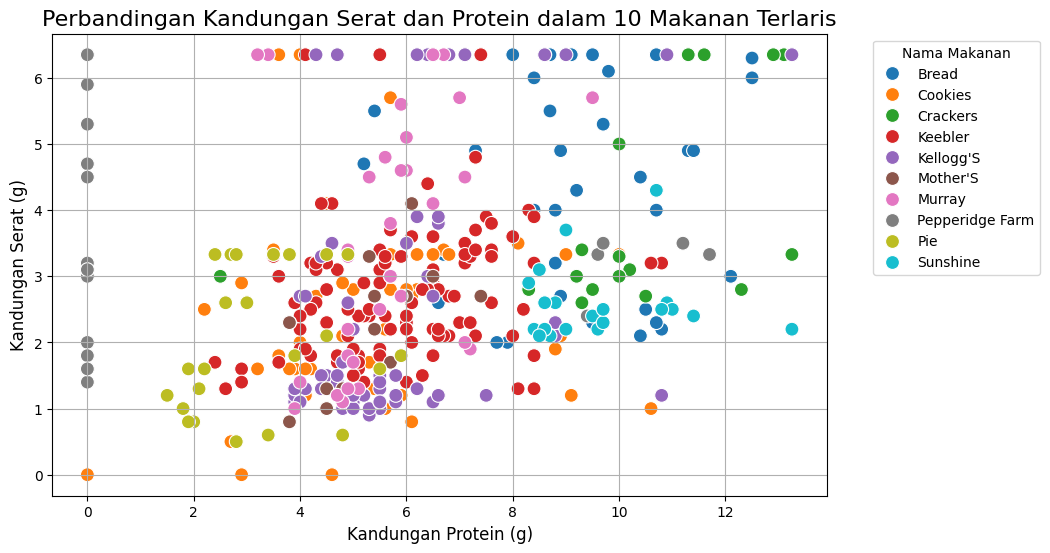

In [63]:
top_10_foods = df['Food'].value_counts().nlargest(10).index.tolist()

top_10_data = df[df['Food'].isin(top_10_foods)]

plt.figure(figsize=(10, 6))

sns.scatterplot(x='Protein-g', y='Fiber-g', data=top_10_data, hue='Food', s=100)

plt.title('Perbandingan Kandungan Serat dan Protein dalam 10 Makanan Terlaris', fontsize=16)
plt.xlabel('Kandungan Protein (g)', fontsize=12)
plt.ylabel('Kandungan Serat (g)', fontsize=12)
plt.grid(True)

plt.legend(title='Nama Makanan', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## Insight serta tindakan yang dapat diambil

10 Makanan yang paling banyak dibeli

1.   **10 Makanan teratas**
      *   **Insight:** Kebanyakan konsumen membeli makanan dengan merek Keebler. Sedangkan Bread yang termasuk ke dalam makanan sehat menempati posisi ke-4 makanan yang dibeli.
      *   **Tindakan:** Peningkatan promosi untuk makanan lain diperlukan agar konsumen bisa memilih makanan yang lebih sehat.

2.   **Jenis Makanan Sehat**
     *   **Insight:** Pilihan makanan sehat yang sangat terbatas.
     *   **Tindakan:** Toko perlu menambahkan lebih banyak makanan yang sehat agar konsumen memiliki lebih banyak pilihan makanan. Melakukan promosi makanan sehat untuk meningkatkan kesadaran konsumen akan kesehatan makanan yang dikonsumsi.

3.   **Kandungan Protein dan Serat dalam makanan yang sehat**
     *   **Insight:** Serat dan Protein yang terkandung dalam makanan yang dianggap sehat pun memiliki angka yang cukup kecil.
     *   **Tindakan:** Toko perlu memperhatikan dan meningkatkan bahan makanan agar serat dan protein dari makanan yang di buat lebih meningkat.

4.   **Perbandingan antara makanan sehat dan tidak sehat**
     *   **Insight:** Pie Chart menunjukkan bahwa ada perbedaan yang sangat signifikan antara makanan sehat yang hanya 0.8% dibeli oleh konsumen dan makanan yang tergolong tidak sehat dibeli 99.2% oleh konsumen.
     *   **Tindakan:** Perlu meningkatkan kesadaran konsumen terhadap makanan sehat dan toko bisa membuat inovasi dengan memodifikasi resep makanan yang dianggap tidak sehat agar bisa lebih sehat.

5.   **Perbandingan serat dan protein dalam 10 makanan terlaris**
     *   **Insight:** Scatterplot menunjukkan bahwa makanan yang tergolong tidak sehat memiliki kandungan serat dan protein yang lebih rendah jika dibandingkan dengan makanan sehat (Bread) yang terdapat dalam 10 makanan terlaris
     *   **Tindakan:** Meningkatkan bahan makanan dan resep untuk membuat makanan makanan tersebut lebih sehat.



